In [127]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [128]:
# 타이타닉의 생존자 분류 모델을 구현하시오.
# target : survived
# data : 그외

# data로 사용할 feature
# pclass: 승객등급
# survived : 생존1/죽음0
# sibsp: 함께 탑승한 형제 또는 배우자 수
# parch : 함께 탑승한 부모 또는 자녀 수
# ticket : 티켓 번호
# cabin : 선실번호  # null값이 너무 많아서 삭제
# embarked : 탑승 장소

# 분류 : 로지스틱,랜덤포레스트, 결정트리

In [129]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0,NaN,S,NaN,"Cornwall / Akron, OH"


In [130]:
df_test = pd.read_csv('titanic_test.csv')

In [131]:
df_train.info() # age: 175 null, cabin: 702
df_train.shape  # (916,13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


(916, 13)

In [132]:
df_test.info()  # age : 88 null, cabin: 312
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


(393, 13)

In [133]:
df = pd.concat([df_train,df_test])
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"


In [134]:
# 데이터 전처리 1.
# null 값을 어떻게 처리할 것인지
# 모두 0 처리, 삭제, 평균값
# 나이는 평균값으로 처리
# cabin(객실 번호)는 0 값으로 처리
df = df.fillna({'age':df['age'].mean()}) 
# df.info()

# df_test = df_test.fillna({'age':df_test['age'].mean(),
                        #   'cabin':0})
# df_test.info()

# 불필요한 열 삭제  ( name, cabin은 나중에 추가해서 다시 해보도록 )
df = df.drop(columns={'ticket','body','home.dest'},axis=0)
# df_test = df_test.drop(columns={'name','ticket','body','cabin','home.dest'},axis=0)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,19.5000,NaN,S
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,23.0000,NaN,S
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,13.8583,NaN,C


In [135]:
# sex, embarked -> 원핫인코딩
# male = 1, female = 0
# C = 0, Q = 1, S = 2

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
# df_test['sex'] = le.fit_transform(df_test['sex'])

df['embarked'] = le.fit_transform(df['embarked'])
# df_test['embarked'] = le.fit_transform(df_test['embarked'])

df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",0,13.000000,0,1,19.5000,NaN,2
1,2,1,"Wells, Miss. Joan",0,4.000000,1,1,23.0000,NaN,2
2,2,1,"Duran y More, Miss. Florentina",0,30.000000,1,0,13.8583,NaN,0
3,3,0,"Scanlan, Mr. James",1,29.881138,0,0,7.7250,NaN,1
4,3,1,"Bradley, Miss. Bridget Delia",0,22.000000,0,0,7.7250,NaN,1


In [136]:
df['name'] = df['name'].str.split(',').str[1].str.split('.').str[0]

df['cabin'].unique()
df['cabin'].value_counts()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
                  ..
C91                1
D40                1
B3                 1
E45                1
F38                1
Name: count, Length: 186, dtype: int64

In [137]:
df['cabin'] = df['cabin'].str.split('').str[1]
df = df.fillna({'cabin':'N'})   # cabin의 Nan값은 N으로 처리

In [138]:
df['cabin'] = le.fit_transform(df['cabin'])

In [146]:
df['name'].unique()
# 보통 여자는 Miss,Ms 남자는 Mr,Mrs, Master를 많이 씀
# 바꿔줘야한다.

array([' Miss', ' Mr', ' Master', ' Mrs', ' Dr', ' Mlle', ' Col', ' Rev',
       ' Ms', ' Mme', ' Sir', ' the Countess', ' Dona', ' Jonkheer',
       ' Lady', ' Major', ' Don', ' Capt'], dtype=object)

In [140]:
df_male = df[df['sex'] == 1]
df_female = df[df['sex']== 0]

In [141]:
x = ['사망','생존']
y1 = df_male['survived'].value_counts()
y2 = df_female['survived'].value_counts()

print(y1)
print(y2)

survived
0    682
1    161
Name: count, dtype: int64
survived
1    339
0    127
Name: count, dtype: int64


Text(생존, 258, '127')

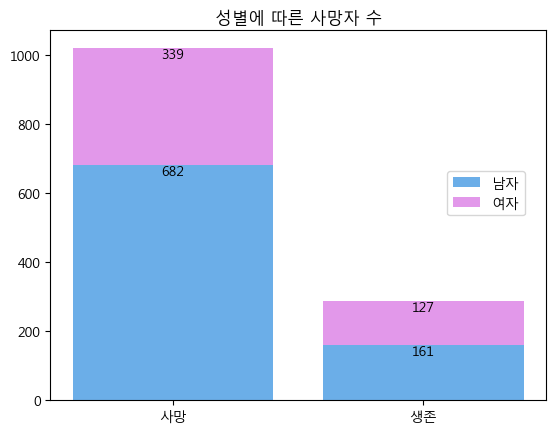

In [142]:
plt.bar(x,y1,label='남자',color='#6BAEE8')
plt.bar(x,y2,bottom=y1,label='여자',color='#E298EA')
plt.legend(loc=(0.8,0.5))
plt.title('성별에 따른 사망자 수')

for i, txt in enumerate(y1):
    plt.text(x[i],y1[i]-30,txt,ha='center')

plt.text(x[0],y1[0]+y2[1]-30,y2[1],ha='center')
plt.text(x[1],y1[1]+y2[0]-30,y2[0],ha='center')

KNN

In [143]:
# 데이터 전처리 2. 데이터 나누기
datas = df.drop(columns={'survived'},axis=0)
target = df['survived']

# test_data = df_test.drop(columns={'survived'},axis=0)
# test_target = df_test['survived']

In [144]:
# 데이터 전처리 2. train, test set 나누기
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    datas,target,random_state=42
)

로지스틱 회귀

In [145]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_data, train_target)

ValueError: could not convert string to float: ' Miss'

In [ ]:
print(lr.score(train_data,train_target))
print(lr.score(test_data,test_target))

0.7910295616717635
0.7926829268292683


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_data)
train_s_data = ss.transform(train_data)
test_s_data = ss.transform(test_data)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_s_data,train_target)

Ridge()

In [ ]:
print(ridge.score(train_s_data,train_target))
print(ridge.score(test_s_data,test_target))

0.3695702354872008
0.37975373935594015


랜덤 포레스트

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=1, random_state=42)
scores = cross_validate(rf,train_data,train_target,return_train_score=True,n_jobs=-1)
rf.fit(train_data,train_target)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9768097621214091 0.7849217859732726


In [ ]:
print(train_data.columns)
print(rf.feature_importances_)  # 어떤 특성이 중요도가 높은지 알려줌

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
       'embarked'],
      dtype='object')
[0.06628122 0.09439445 0.20063215 0.22300397 0.04900391 0.03278635
 0.2323739  0.07112694 0.0303971 ]


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist',random_state=42)
scores = cross_validate(xgb,train_data,train_target,return_train_score=True,n_jobs=-1)

In [ ]:
scores

{'fit_time': array([0.04787207, 0.04787278, 0.04587722, 0.04388285, 0.0428853 ]),
 'score_time': array([0.00797844, 0.00698018, 0.00598764, 0.00598288, 0.00299144]),
 'test_score': array([0.74111675, 0.78571429, 0.79081633, 0.82653061, 0.80612245]),
 'train_score': array([0.96811224, 0.96942675, 0.96305732, 0.96178344, 0.96433121])}

In [ ]:
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9653421942025219 0.7900600849476846


결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_s_data,train_target)
print(dt.score(train_s_data,train_target))
print(dt.score(test_s_data,test_target))  # 73퍼센트

0.9734964322120285
0.7530487804878049


<Axes: >

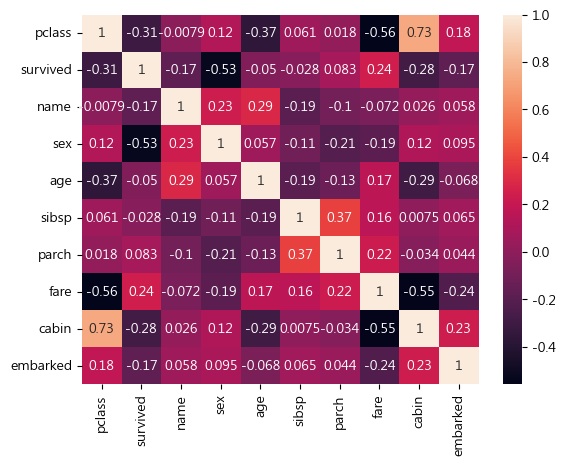

In [ ]:
import seaborn as sns

corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True)

In [ ]:
# 과대적합 해결하기